## About the Dataset

MNIST dataset is one of the classical problem in machine learning which deals to tackle the problem of recognizing hand-writeen digits from 0 through 9. It is often referred to as the 'Hello World Program'  for Machine Learning!

The dataset consists of 60,000 training images and 10,000 test images of digits each being 28 x 28 pixels in size.


We'll be traning a basic neural network to deal with the problem statement using Keras framework. It is a simple yet elegant, pseudocode-based framework which is used over Tensorflow and you'll get to learn about it as you'll move forward here. so let us get going!

### Setting Imports

In [2]:
import numpy as np
import keras

import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


**Defining a function to pre-process the dataset and return the traning and testing sets separately**

In [0]:
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

11493376/11490434 [==============================] - 3s 0us/step


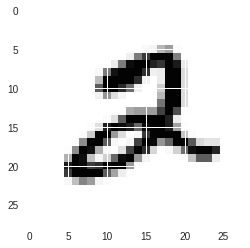

In [6]:
plt.imshow(X_train[5]);

---
### Deep Learning Section using Tensorflow's Keras

In [0]:
import tensorflow as tf
s = tf.InteractiveSession()

Here, 

tf.InteractiveSession() is used to start up a tensorflow session which will install itself up as according to the model without needing to call it explicitly everytime.

In [0]:
from keras.models import Sequential
import keras.layers as layer

# Sequential is a layered architecture model 
# containing input, hidden and output layers all stacked up in a pipeline
model = Sequential()

# this method makes up the input layer of size (28x28, 1) i.e. (784,1)
model.add(layer.InputLayer([28, 28]))
# converts the [28,28] layer into one-dimensional
model.add(layer.Flatten())          

### network architecture ###

# first hidden layer
model.add(layer.Dense(128))
model.add(layer.Activation('relu'))

# second hidden layer
model.add(layer.Dense(64,kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layer.Activation('relu'))

# third hidden layer
model.add(layer.Dense(64))
model.add(layer.Activation('linear'))

# output layer: 10 neurons for each class with softmax activation
model.add(layer.Dense(10, activation='softmax'))

# adam -> optimizer
# categorical_crossentropy -> loss function
# and lastly for the accuracy check metrics
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [16]:
# method outputs the dimensions and the architecture of the model which is to be trained
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
__________

---
### Fitting/Training the Model

In [17]:
# method fits (or starts the training of) the model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=10);

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 249us/step - loss: 0.4609 - acc: 0.9173 - val_loss: 0.2056 - val_acc: 0.9591
Epoch 2/10
50000/50000 [==============================] - 12s 245us/step - loss: 0.1806 - acc: 0.9601 - val_loss: 0.1477 - val_acc: 0.9679
Epoch 3/10
50000/50000 [==============================] - 12s 246us/step - loss: 0.1336 - acc: 0.9709 - val_loss: 0.1257 - val_acc: 0.9701
Epoch 4/10
50000/50000 [==============================] - 12s 244us/step - loss: 0.1150 - acc: 0.9743 - val_loss: 0.1236 - val_acc: 0.9729
Epoch 5/10
50000/50000 [==============================] - 12s 245us/step - loss: 0.0976 - acc: 0.9795 - val_loss: 0.1186 - val_acc: 0.9726
Epoch 6/10
50000/50000 [==============================] - 12s 244us/step - loss: 0.0858 - acc: 0.9818 - val_loss: 0.1156 - val_acc: 0.9760
Epoch 7/10
50000/50000 [==============================] - 12s 243us/step - loss: 0.0785 - acc: 0.9836 - val_loss: 0.

In [18]:
# estimate probabilities P
model.predict_proba(X_val[:2])

array([[3.0103020e-13, 5.9626331e-09, 1.7813804e-08, 9.9999619e-01,
        1.1051878e-12, 3.6908311e-06, 1.5752575e-14, 2.1197792e-08,
        1.0225729e-07, 1.9934802e-08],
       [1.4315302e-07, 2.0601997e-06, 4.2718298e-06, 1.4301049e-06,
        1.0416604e-08, 9.3313353e-08, 1.8712474e-07, 2.7117085e-07,
        9.9999142e-01, 7.0709731e-08]], dtype=float32)

In [0]:
# Save trained weights
model.save("weights.h5")

In [20]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

10000/10000 [==============================] - 1s 75us/step

Loss, Accuracy =  [0.1197252769857645, 0.9725]


---
### Finally, testing the Model!

In [22]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))


Test accuracy: 97.25 %


---
### Making the model even better

There are various aspects where the model's performace can be improved even after reaching a 98% mark like:

- **Network Architecture and size** plays a significant role in optimizing a model's performance
    - The number of layers and neurons in each layer can be played with 
    - Various activation function also helps at times
    - Number of epochs can be twitched as per your choice (of course keeping in mind that it doesn't overfit)
    
- **Early Stopping, Dropouts and Regularization**
    - If the model overfits (which happens in most cases) then these techniques can be equiped to avoid it.
    - *Early stopping*, as the name goes, is used to stop the training of the model when a mark (say 98% accuracy) is reached; hence the model won't overfit and squeeze out the accuracy outta it. It will also reduce the time in case, you mentioned it to run for 100 epochs but the network has already converged in say 20 epochs then it'll stop!
    - *Dropout* is to make some neurons dead while training which too helps avoid the overfitting of the model
    - Regularization techniques (like L1, L2, etc) can be used to optimize the model's performance even more

* __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on are available in Keras to be implemented.
   * One which converges faster and sometimes reach better optima should be the user's choice
   * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs